In [1]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
importlib.reload(retro)
importlib.reload(ru)
import numpy as np
import pickle
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


# Test solubility

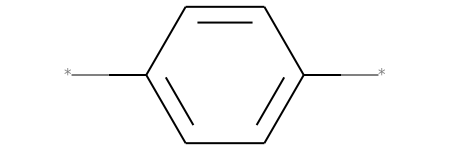

In [8]:
mol = Chem.MolFromSmiles('[*]c1ccc([*])cc1')
mol

In [17]:
type(Chem.MolFromSmarts('[R0]'))

rdkit.Chem.rdchem.Mol

In [18]:
mol.GetSubstructMatches(Chem.MolFromSmarts('[R0]'))

((0,), (5,))

In [20]:
importlib.reload(ru)
ru.is_soluble(mol) #should be False

False

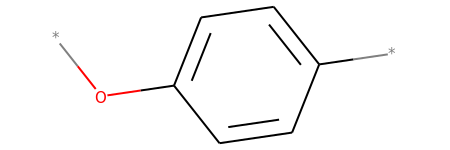

In [3]:
mol2 = Chem.MolFromSmiles('[*]Oc1ccc([*])cc1')
mol2

In [21]:
ru.is_soluble(mol2) #should be True

True

In [22]:
'dep' in 'depol'

True

# Test synthetic score

In [ ]:
with open('/data/rgur/retrosynthesis/molecule_lookup/mol_set.pkl','rb') as f:
    mol_set = pickle.load(f)

In [24]:
Chem.MolToSmiles(mol)

'*c1ccc(*)cc1'

In [52]:
importlib.reload(retro)
paths = retro.retrosynthesize([Chem.MolToSmiles(mol)])
paths

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
#######
*c1ccc(*)cc1
<function ring_close_retro at 0x7f69e0236730>
inner_RxnPaths len: 0
<function func_chain_retro at 0x7f69e0236378>
inner_RxnPaths len: 0
<function hydrogenate_chain at 0x7f69e156a268>
inner_RxnPaths len: 0
<function elim_retro at 0x7f69e0236bf8>
inner_RxnPaths len: 6
sm_RxnPaths len: 7


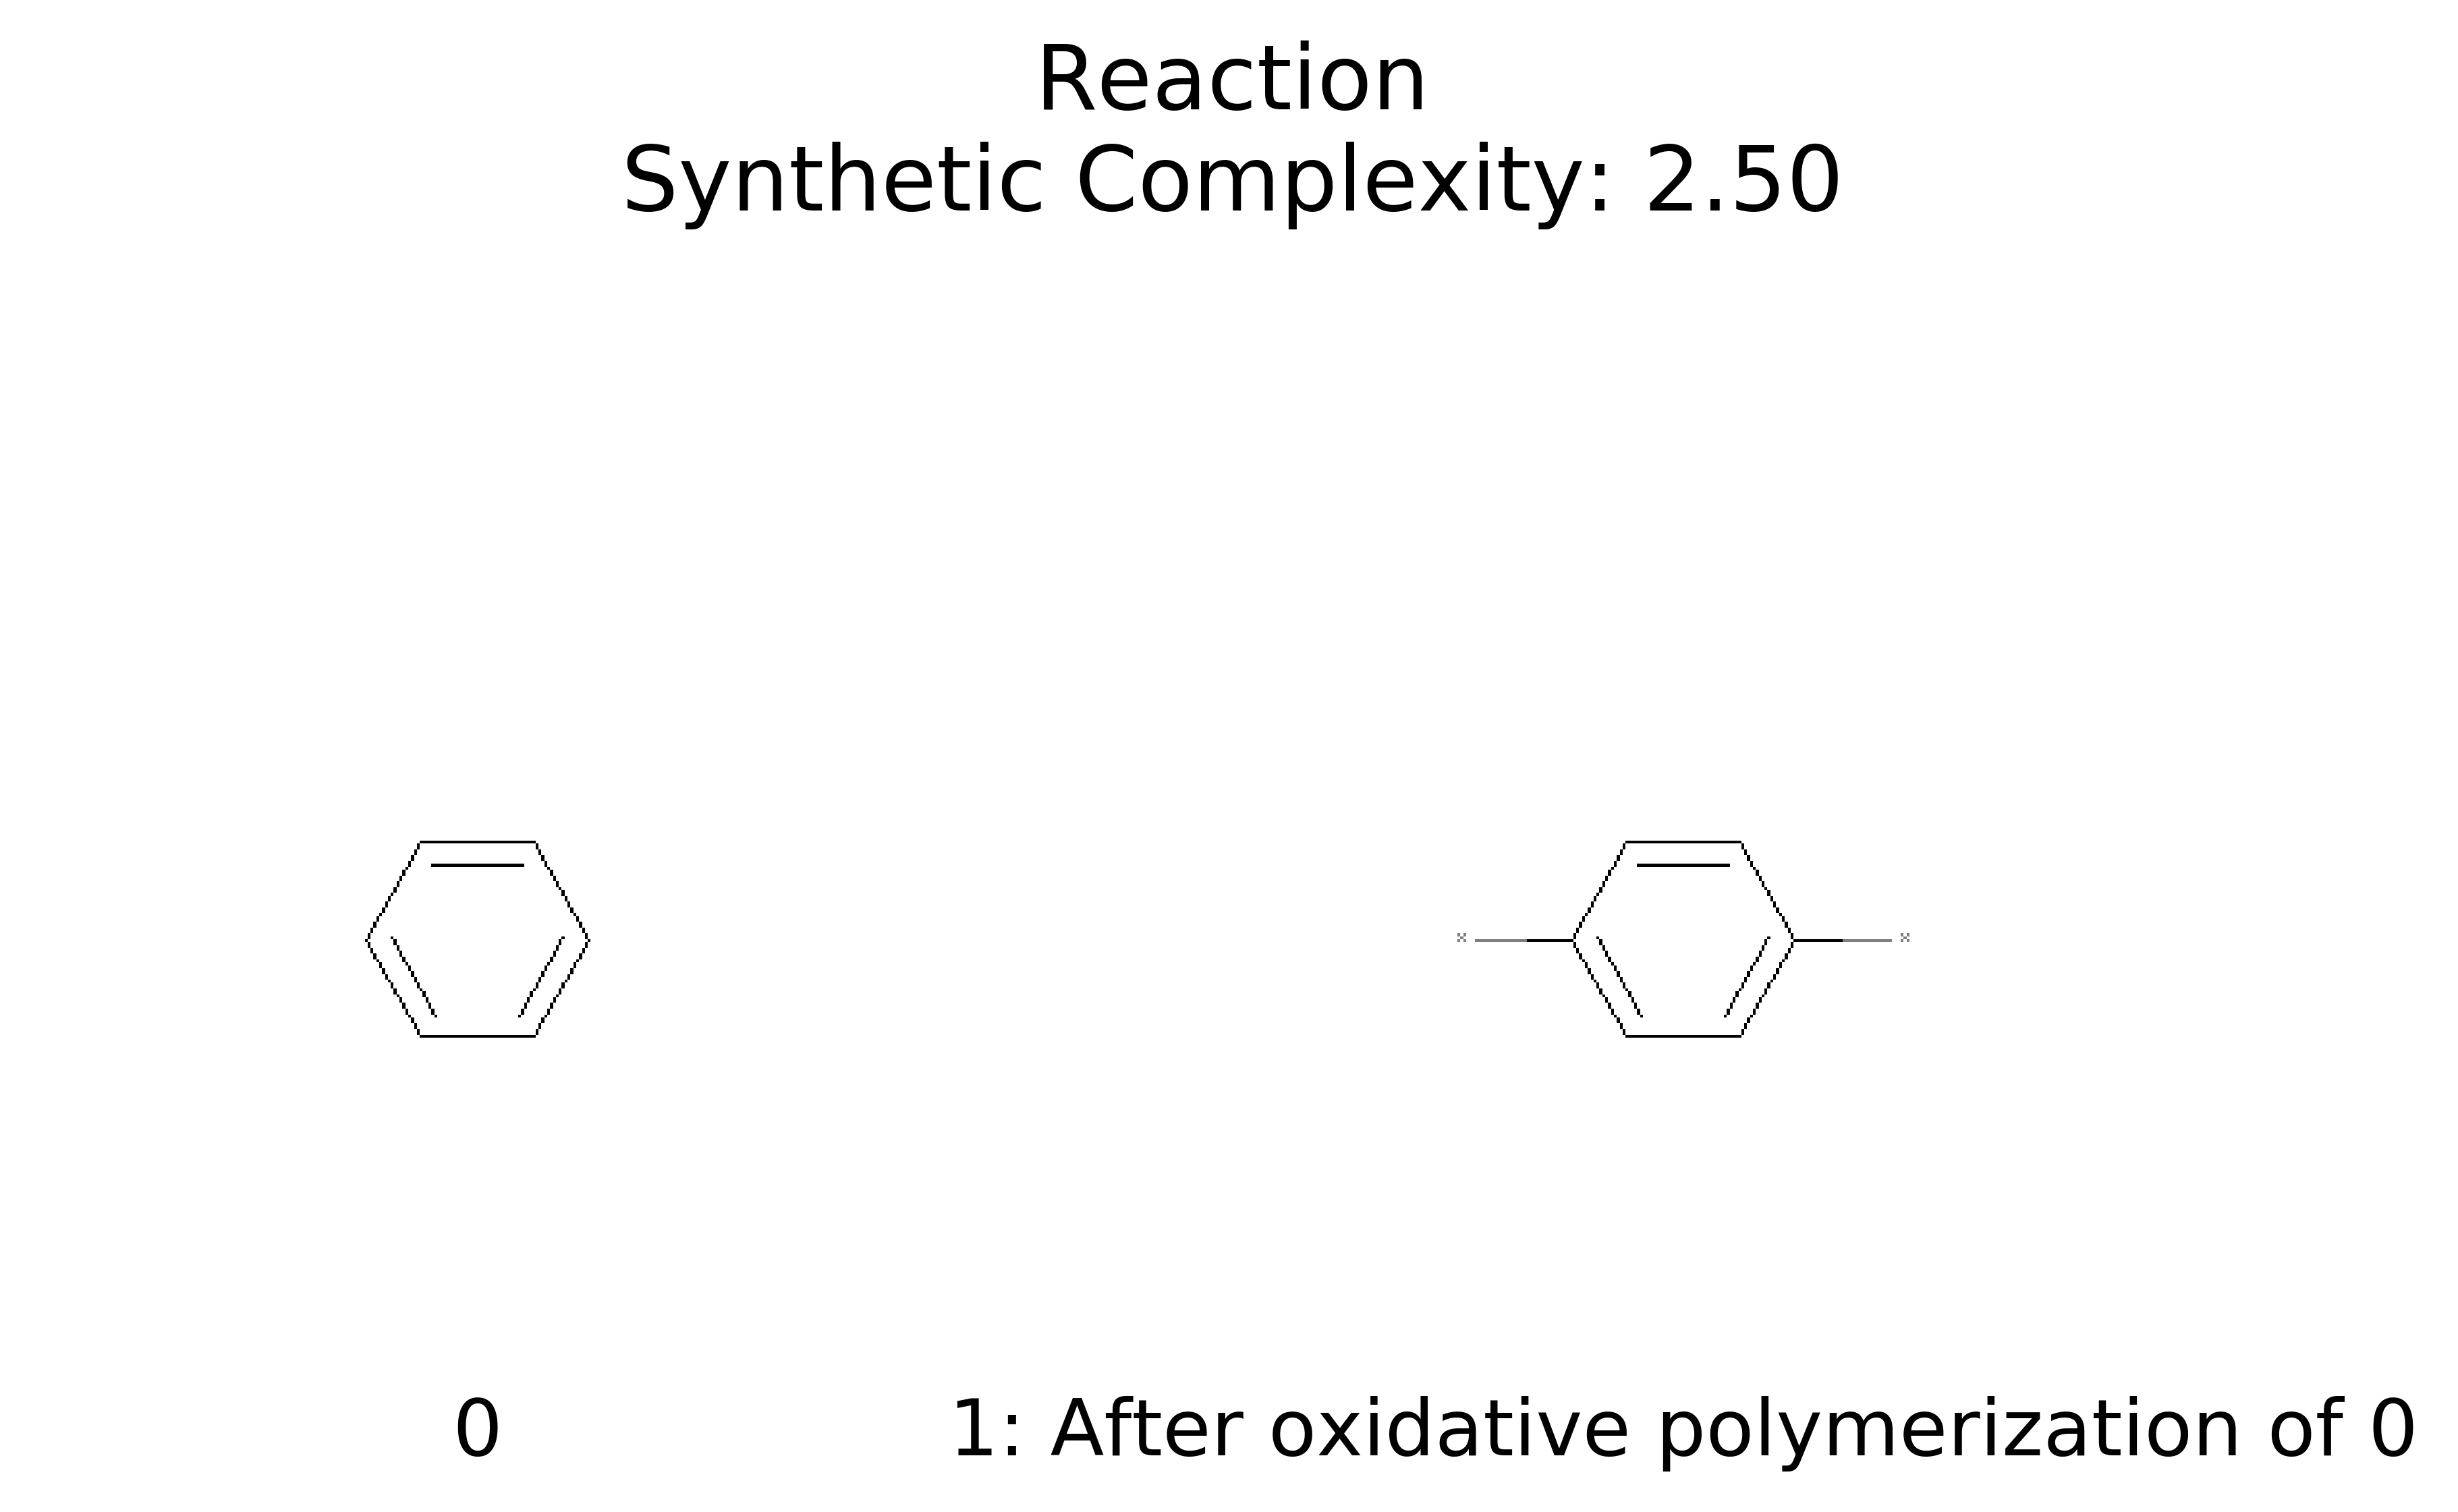

In [53]:
paths[0].SearchReactants(mol_set)
paths[0].SyntheticScore()
paths[0].DrawSteps()

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


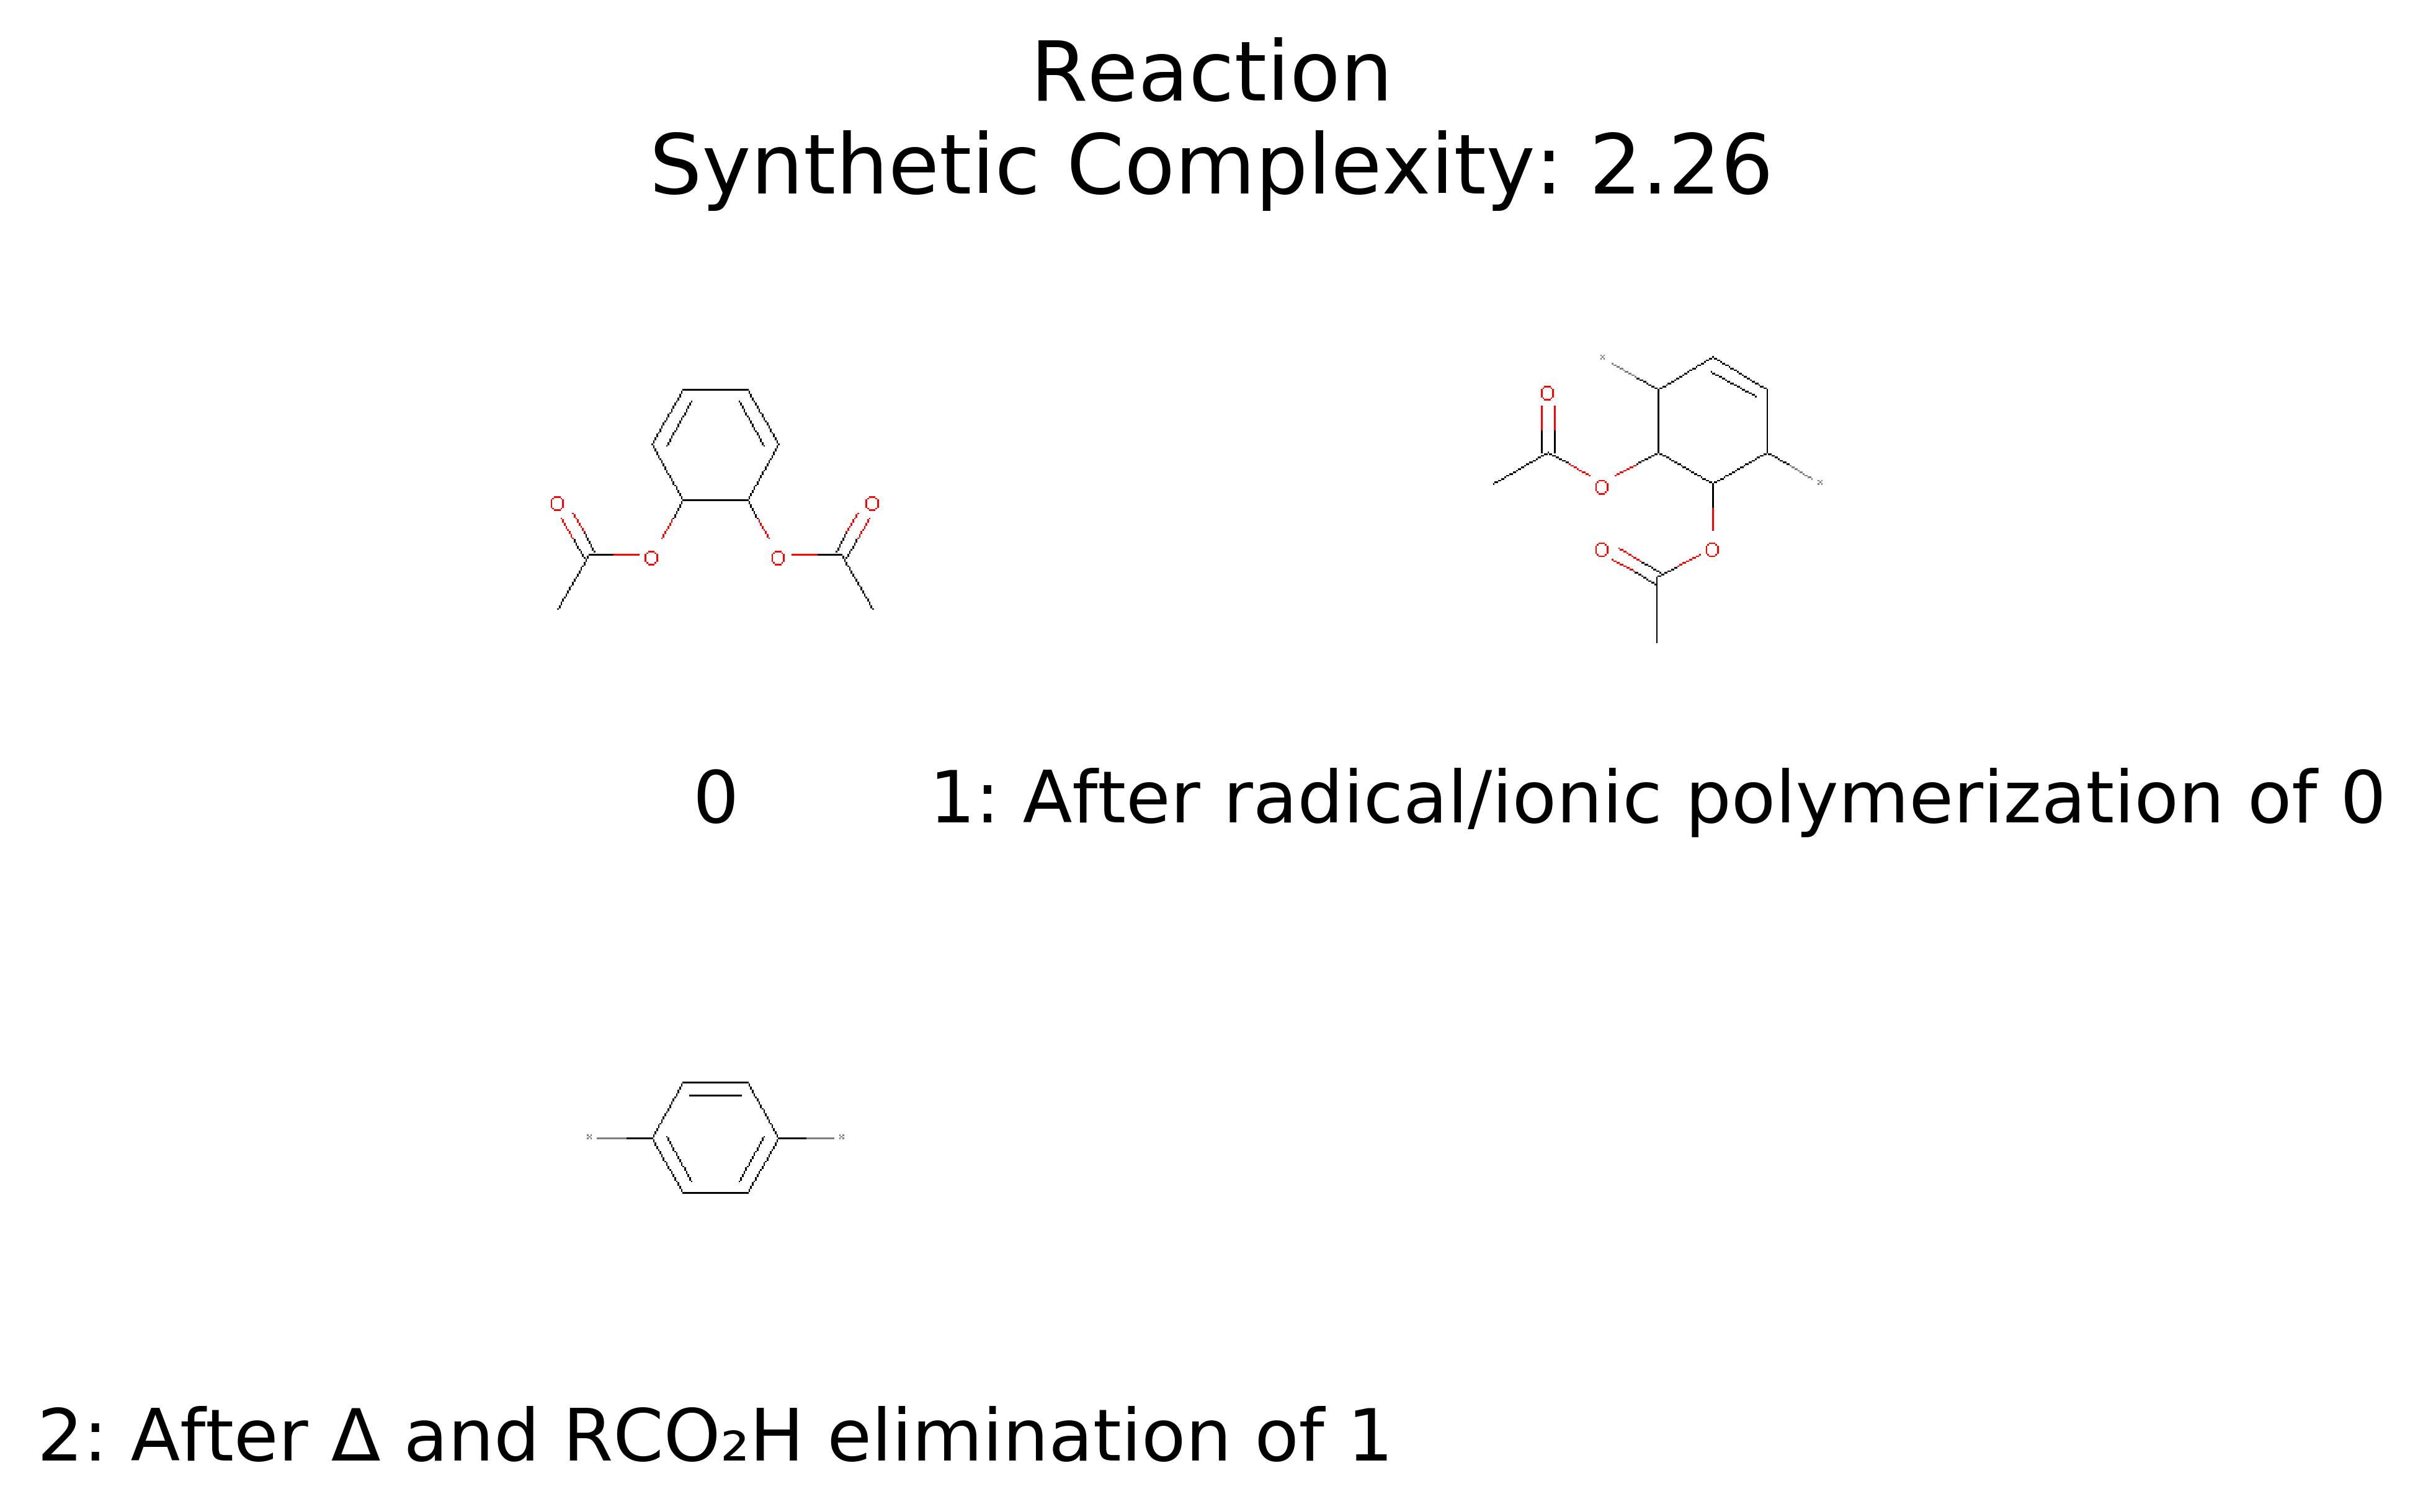

In [55]:
importlib.reload(retro)
paths[1].SearchReactants(mol_set)
paths[1].SyntheticScore()
paths[1].DrawSteps()

# Test SO2 oxidation

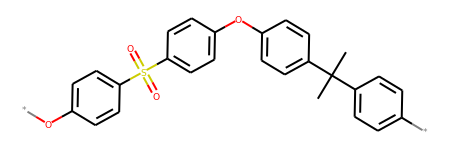

In [3]:
mol = Chem.MolFromSmiles('[*]Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C(C)(C)c4ccc([*])cc4)cc3)cc2)cc1')
mol

In [10]:
lp = ru.LinearPol(mol)

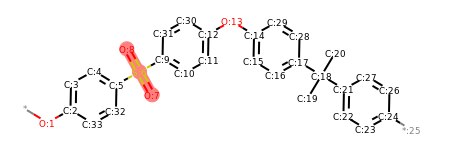

In [19]:
ru.mol_with_atom_index(lp.mol)

In [20]:
matches = lp.mol.GetSubstructMatches(Chem.MolFromSmiles('S(=O)(=O)'))
matches

((6, 7, 8),)

In [28]:
match_combo = matches

In [29]:
o_inds = []
for match in match_combo:
    o_inds.append(match[1])
    o_inds.append(match[2])
o_inds = sorted(o_inds,reverse=True)
o_inds

[8, 7]

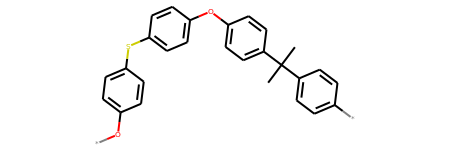

In [30]:
# for x in s_inds:
#     lp.mol.GetAtomWithIdx(x).SetIsAromatic(False)
em = Chem.EditableMol(lp.mol)
[em.RemoveAtom(x) for x in o_inds]
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
ru.mol_without_atom_index(new_mol


# Test SO2 oxidation

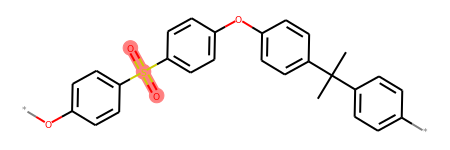

In [40]:
mol

In [45]:
importlib.reload(retro)
ru.mol_without_atom_index(mol)
out=retro.func_chain_retro(mol,'SO2_oxidation')
out

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


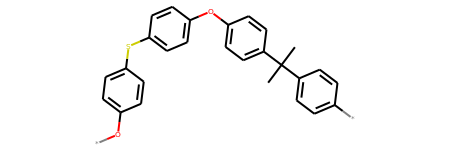

In [46]:
out[0]

# Fix overflow error

In [2]:
sm_ls = []
with open('/data/rgur/g2g/spiro_vol/incomplete_run2/SR1/resultsList_09_10PM_on_January_20_2021.txt','r') as f:
    for line in f:
        sm_ls.append( line.strip() )

In [37]:
importlib.reload(retro)
importlib.reload(ru)
out = retro.retrosynthesize(sm_ls[30:35],n_core=1,hydrogenate_chain=False,debug=True)

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
*C(CC=O)C(*)CCCCC(=O)Oc1ccc2c(c1)Oc1ccccc1C21c2ccccc2-c2ccccc21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
#######
[*]C(CC=O)C([*])CCCCC(=O)Oc1ccc2c(c1)Oc1ccccc1C21c2ccccc2-c2ccccc21
Exlude rxns: ['hydrogenate_chain']
<function ring_close_retro at 0x7f2200f5f0e0>

*C(CC=O)C(*)CCCCC(=O)Oc1ccc2c(c1)Oc1ccccc1C21c2ccccc2-c2ccccc21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
!!!Periodization of *C(CC=O)C(*)CCCCC(=O)Oc1ccc2c(c1)Oc1ccccc1C21c2ccccc2-c2ccccc21 Failed!!!
inner_RxnPaths len: 0
<function func_chain_retro at 0x7f2258b80d40>

*C(CC=O)C(*)CCCCC(=O)Oc1ccc2c(c1)Oc1ccccc1C21c2ccccc2-c2ccccc21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
*C(CC=O)C(*)CCCCC(=O)Oc1ccc2c(

ValueError: 

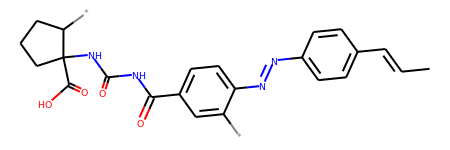

In [38]:
mol = Chem.MolFromSmiles('*c1cc(C(=O)NC(=O)NC2(C(=O)O)CCCC2*)ccc1N=Nc1ccc(C=CC)cc1')
mol

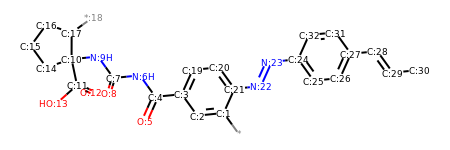

In [39]:
ru.mol_with_atom_index(mol)

In [20]:
lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
pm.connector_inds

[0, 16]

In [34]:
lp.star_inds

[0, 18]

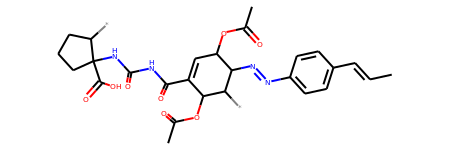

In [17]:
retro.elim_retro(mol,'RCO2H')[12]